In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Reading merged bike datas for 2018
chicago_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/chicago_merged_2018.csv")
dc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
nyc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")

In [3]:
chicago_2018.head()

,start_date,start_hour_range,start_station_name,trip_count,trip_duration_avg,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1am-6am,Broadway & Belmont Ave,1,448,-2,1,-9,0.0,10.74,1.2
1,01/01/2018,1am-6am,Broadway & Cornelia Ave,1,261,-2,1,-9,0.0,10.74,1.2
2,01/01/2018,1am-6am,California Ave & North Ave,1,498,-2,1,-9,0.0,10.74,1.2
3,01/01/2018,1am-6am,Clarendon Ave & Gordon Ter,1,310,-2,1,-9,0.0,10.74,1.2
4,01/01/2018,1am-6am,Clark St & Grace St,1,320,-2,1,-9,0.0,10.74,1.2


In [4]:
# chicago_2018_gb = chicago_2018.groupby(["start_station_name"])
# chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum"}) 
# chicago_2018_agg.reset_index(level=["start_station_name"], inplace=True)
# chicago_2018_agg.sort_values(by='trip_count', ascending=False).head()

In [5]:
# chicago_2018_gb = chicago_2018.groupby(["start_date", "start_station_name"])
# chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
#                                        "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
# chicago_2018_agg.reset_index(level=["start_date", "start_station_name"], inplace=True)

# chicago_2018_agg = chicago_2018_agg[chicago_2018_agg["start_station_name"] == "Streeter Dr & Grand Ave"]
# chicago_2018_agg.head()

In [55]:
chicago_2018_gb = chicago_2018.groupby(["start_date", "start_hour_range"])
chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
                                       "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
chicago_2018_agg.reset_index(level=["start_date", "start_hour_range"], inplace=True)
chicago_2018_agg.head()

,start_date,start_hour_range,trip_count,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,10am-4pm,209,-2,1,-9,0.0,10.74,1.2
1,01/01/2018,1am-6am,37,-2,1,-9,0.0,10.74,1.2
2,01/01/2018,5pm-7pm,53,-2,1,-9,0.0,10.74,1.2
3,01/01/2018,7am-9am,22,-2,1,-9,0.0,10.74,1.2
4,01/01/2018,8pm_12am,55,-2,1,-9,0.0,10.74,1.2


In [4]:
# chicago_2018_gb = chicago_2018.groupby(["start_date", "start_hour_range"])
# chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "PRCP": "mean"}) 
# chicago_2018_agg.reset_index(level=["start_date", "start_hour_range"], inplace=True)
# chicago_2018_agg.head()

,start_date,start_hour_range,trip_count,TAVG,PRCP
0,01/01/2018,10am-4pm,209,-2,0.0
1,01/01/2018,1am-6am,37,-2,0.0
2,01/01/2018,5pm-7pm,53,-2,0.0
3,01/01/2018,7am-9am,22,-2,0.0
4,01/01/2018,8pm_12am,55,-2,0.0


In [56]:
# chicago_2018_gb = chicago_2018.groupby(["start_date"])
# chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
#                                        "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
# chicago_2018_agg.reset_index(level=["start_date"], inplace=True)
# chicago_2018_agg.head()

In [5]:
chicago_2018_m = chicago_2018_agg.drop(["start_date", "trip_count"], axis=1)
chicago_2018_m.head()

,start_hour_range,TAVG,PRCP
0,10am-4pm,-2,0.0
1,1am-6am,-2,0.0
2,5pm-7pm,-2,0.0
3,7am-9am,-2,0.0
4,8pm_12am,-2,0.0


In [6]:
chicago_2018_X = pd.get_dummies(chicago_2018_m)
chicago_2018_X.columns

Index(['TAVG', 'PRCP', 'start_hour_range_10am-4pm', 'start_hour_range_1am-6am',
       'start_hour_range_5pm-7pm', 'start_hour_range_7am-9am',
       'start_hour_range_8pm_12am'],
      dtype='object')

In [7]:
chicago_2018_X.head()

,TAVG,PRCP,start_hour_range_10am-4pm,start_hour_range_1am-6am,start_hour_range_5pm-7pm,start_hour_range_7am-9am,start_hour_range_8pm_12am
0,-2,0.0,1,0,0,0,0
1,-2,0.0,0,1,0,0,0
2,-2,0.0,0,0,1,0,0
3,-2,0.0,0,0,0,1,0
4,-2,0.0,0,0,0,0,1


In [8]:
chicago_2018_Y = chicago_2018_agg["trip_count"].values.reshape(-1, 1)

In [9]:
print(chicago_2018_X.shape, chicago_2018_Y.shape)

(1825, 7) (1825, 1)


In [10]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago = train_test_split(chicago_2018_X, chicago_2018_Y, random_state=42)


In [11]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler_chicago = StandardScaler().fit(X_train_chicago)
y_scaler_chicago = StandardScaler().fit(y_train_chicago)


C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled_ch = X_scaler_chicago.transform(X_train_chicago)
X_test_scaled_ch = X_scaler_chicago.transform(X_test_chicago)
y_train_scaled_ch = y_scaler_chicago.transform(y_train_chicago)
y_test_scaled_ch = y_scaler_chicago.transform(y_test_chicago)

C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Sumeira\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model_ch = LinearRegression()
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# predictions_ch = model_ch.predict(X_test_ch)

Text(0.5, 1.0, 'Residual Plot - Chicago')

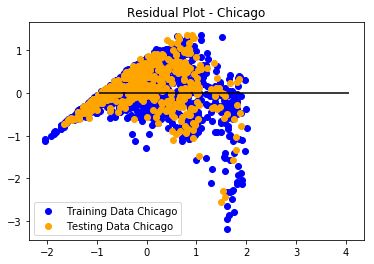

In [14]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions_ch = model_ch.predict(X_test_scaled_ch)
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

plt.scatter(model_ch.predict(X_train_scaled_ch), model_ch.predict(X_train_scaled_ch) - y_train_scaled_ch, c="blue", label="Training Data Chicago")
plt.scatter(model_ch.predict(X_test_scaled_ch), model_ch.predict(X_test_scaled_ch) - y_test_scaled_ch, c="orange", label="Testing Data Chicago")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_ch.min(), xmax=y_test_scaled_ch.max())
plt.title("Residual Plot - Chicago")

In [15]:
print('Weight coefficients: ', model_ch.coef_)
print('y-axis intercept: ', model_ch.intercept_) 

Weight coefficients:  [[ 5.41667788e-01 -1.23987103e-01 -2.46144271e+13 -2.46144271e+13
  -2.42420357e+13 -2.46475138e+13 -2.43792603e+13]]
y-axis intercept:  [-0.00296943]


In [18]:
print(f"True output: {y_test_scaled_ch[14]}")
print(f"Predicted output: {predictions_ch[14]}")
print(f"Prediction Error: {predictions_ch[14] - y_test_scaled_ch[14]}")

True output: [-0.90418119]
Predicted output: [-1.19828193]
Prediction Error: [-0.29410074]


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted_ch = model_ch.predict(X_test_scaled_ch)

# Score the prediction with mse and r2
mse_ch = mean_squared_error(y_test_scaled_ch, predicted_ch)
r2_ch = r2_score(y_test_scaled_ch, predicted_ch)

print(f"Mean Squared Error (MSE) - Chicago: {mse_ch}")
print(f"R-squared (R2 ) - Chicago: {r2_ch}")

Mean Squared Error (MSE) - Chicago: 0.2773364943560316
R-squared (R2 ) - Chicago: 0.6570263050630936


In [20]:
model_ch.score(X_test_scaled_ch, y_test_scaled_ch)

0.6570263050630936

In [73]:
# Mean Squared Error (MSE) - Chicago: 0.11274508098837624
# R-squared (R2 ) - Chicago: 0.8625831625991298